In [75]:
import json
import pandas as pd
from sklearn.metrics import silhouette_score,calinski_harabasz_score,pairwise_distances
from Kernels.src.Analysis.Clustering import *
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
import itertools
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
import lifelines
import statsmodels.api as sm
import itertools
from scipy import stats
import plotly.graph_objects as go
from matplotlib.offsetbox import AnchoredText
import matplotlib.font_manager as fm


In [76]:
fontPath = "/CTGlab/home/danilo/.fonts/Inter-VariableFont_wght.ttf" 

In [77]:
data_input = pd.read_csv("Input_data/UMAP_METABRIC_4cmp_IC10_full.csv", sep = ",",index_col=0)
data_input=data_input.sample(n=100,axis=0,random_state=42)
df_new_clust=pd.DataFrame()
df_new_clust.index=data_input.index

In [78]:
#get classical kernel
#SELECT FT
n_qubits=4
features=[]
for i in range(1,int(n_qubits)+1):
    name_cna='Component_'+str(i)
    features.append(name_cna)
labels = 'IntClustMemb'
print(features)

########SAMPLING###################################
y_train=data_input[labels].to_numpy()
X_train=data_input[features]

['Component_1', 'Component_2', 'Component_3', 'Component_4']


### Hardware comparison

In [108]:
outdir='/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_umap_100_hardware/Mumbai_CU/'
df_real=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_umap_100_hardware/Mumbai_CU/clustering_100_opt_k_reviewed.csv')
df_sim=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_100_umap/clustering_100_opt_k_reviewed.csv')

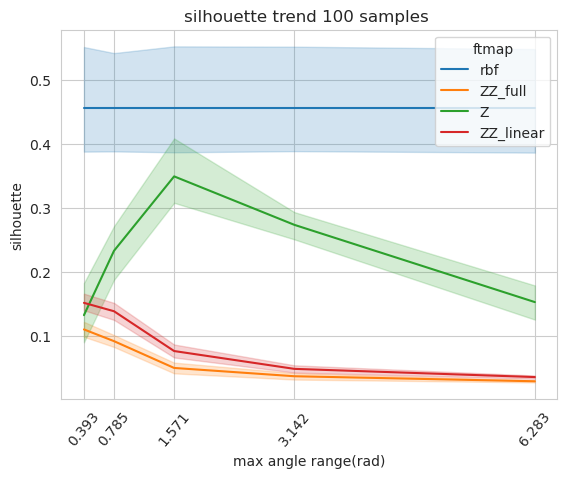

In [81]:
df_real['Max angle']=df_real['Bandwidth']*np.pi
g=sns.lineplot(data=df_real,x='Max angle',y='silhouette',hue='ftmap')
plt.title('{} trend {} samples '.format('silhouette',df_real.N_samples[0]))
plt.xlabel('max angle range(rad)')
#plt.ylim(0,0.4)
plt.xticks(df_real['Max angle'].unique(),rotation=50)
sns.move_legend(g, "upper right")


In [82]:

#Tag simulated and real data
df_real['Type']=['Real']*len(df_real)
df_sim['Type']=['Simulated']*len(df_sim)


In [83]:
df= pd.concat([df_sim, df_real], axis=0, ignore_index=True)

In [84]:
df.replace('Z_full','Z',inplace=True)


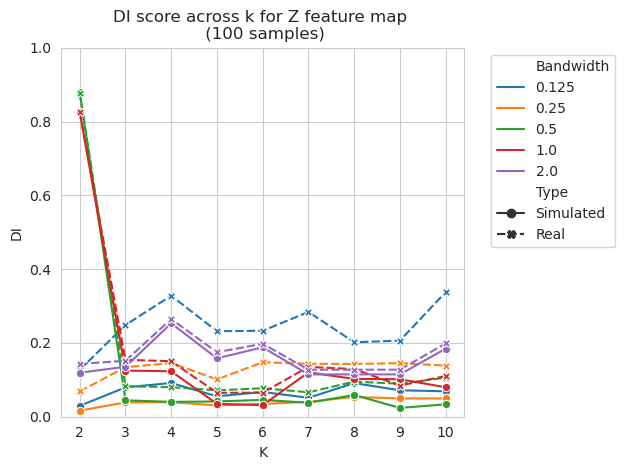

In [85]:

ft_map_to_plot='Z'
score_to_plot='DI'
sns.set_style("whitegrid")

sns.lineplot(data=df[df['ftmap'].isin([ft_map_to_plot])],
             x='K',y=score_to_plot,style='Type',hue='Bandwidth',markers=True,palette='tab10')


# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('{} score across k for {} feature map \n ({} samples)'.format(score_to_plot,ft_map_to_plot,df.N_samples[0]))
plt.tight_layout()
plt.ylim(0,1)
# Show the plot
plt.savefig(outdir+'{}_ftmap_coherence_{}_score.png'.format(ft_map_to_plot,score_to_plot))


## Clustering coherence

In [86]:
df_clust_real=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_umap_100_hardware/Mumbai_CU/clustering_100_clusters.csv',index_col=0)
df_clust_sim=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_100_umap/clustering_100_clusters.csv',index_col=0)

Calculate NMI and Rand Index between the simulation results and its real counterpart

In [87]:
#calculate nmi, ami and ari between real and simulated comon columns
#save the results in a dictionary

nmi_ari_dict_list=[]
for col in df_clust_real.columns:
    
    clust=col.split('_')
  

    if clust[1]=='Z':
        ftmap=clust[1]

        
    elif clust[1]=='ZZ':
        ftmap=clust[1]+'_'+clust[2]
    else:
        ftmap='rbf'

    ari=adjusted_rand_score(df_clust_real[col],df_clust_sim[col])
    nmi=normalized_mutual_info_score(df_clust_real[col],df_clust_sim[col])
    ami=adjusted_mutual_info_score(df_clust_real[col],df_clust_sim[col])
    print('ARI for {} is {}'.format(col,ari))
    print('NMI for {} is {}'.format(col,nmi))
    print('AMI for {} is {}'.format(col,ami))


    nmi_ari_dict_list.append({'ftmap':ftmap,
                              'K':clust[-2],
                              'Bandwidth':clust[-1],
                              'ARI':ari,
                              'NMI':nmi,
                              'AMI':ami})


ARI for Cluster_rbf_2_0.125 is 1.0
NMI for Cluster_rbf_2_0.125 is 1.0
AMI for Cluster_rbf_2_0.125 is 1.0
ARI for Cluster_rbf_3_0.125 is 1.0
NMI for Cluster_rbf_3_0.125 is 1.0
AMI for Cluster_rbf_3_0.125 is 1.0
ARI for Cluster_rbf_4_0.125 is 1.0
NMI for Cluster_rbf_4_0.125 is 1.0
AMI for Cluster_rbf_4_0.125 is 1.0
ARI for Cluster_rbf_5_0.125 is 1.0
NMI for Cluster_rbf_5_0.125 is 1.0
AMI for Cluster_rbf_5_0.125 is 1.0
ARI for Cluster_rbf_6_0.125 is 1.0
NMI for Cluster_rbf_6_0.125 is 1.0
AMI for Cluster_rbf_6_0.125 is 1.0
ARI for Cluster_rbf_7_0.125 is 1.0
NMI for Cluster_rbf_7_0.125 is 1.0
AMI for Cluster_rbf_7_0.125 is 1.0
ARI for Cluster_rbf_8_0.125 is 1.0
NMI for Cluster_rbf_8_0.125 is 1.0
AMI for Cluster_rbf_8_0.125 is 1.0
ARI for Cluster_rbf_9_0.125 is 1.0
NMI for Cluster_rbf_9_0.125 is 1.0
AMI for Cluster_rbf_9_0.125 is 1.0
ARI for Cluster_rbf_10_0.125 is 1.0
NMI for Cluster_rbf_10_0.125 is 1.0
AMI for Cluster_rbf_10_0.125 is 1.0
ARI for Cluster_rbf_2_0.25 is 1.0
NMI for Cluster_rb

In [88]:
#List of dictionaries to dataframe
df_nmi_ari=pd.DataFrame(nmi_ari_dict_list)

In [89]:
df_nmi_ari[(df_nmi_ari['ftmap'].isin(['ZZ_full'])) & (df_nmi_ari['Bandwidth'].isin(['0.125']))]

,ftmap,K,Bandwidth,ARI,NMI,AMI
45,ZZ_full,2,0.125,0.835309,0.759024,0.756782
46,ZZ_full,3,0.125,0.932936,0.893895,0.891034
47,ZZ_full,4,0.125,0.888407,0.869677,0.864046
48,ZZ_full,5,0.125,0.799165,0.851326,0.841434
49,ZZ_full,6,0.125,0.590405,0.702903,0.675085
50,ZZ_full,7,0.125,0.778867,0.824708,0.802740
51,ZZ_full,8,0.125,0.618056,0.727987,0.683221
52,ZZ_full,9,0.125,0.533156,0.762204,0.712765
53,ZZ_full,10,0.125,0.613496,0.788437,0.734651


In [120]:
#Select best case according to AMI
df_nmi_ari[df_nmi_ari.ftmap !='rbf'].sort_values(by='AMI',ascending=False).head(15)

,ftmap,K,Bandwidth,ARI,NMI,AMI
120,Z,5,1,1.000000,1.000000,1.000000
122,Z,7,1,1.000000,1.000000,1.000000
100,Z,3,0.25,1.000000,1.000000,1.000000
109,Z,3,0.5,1.000000,1.000000,1.000000
102,Z,5,0.25,1.000000,1.000000,1.000000
108,Z,2,0.5,1.000000,1.000000,1.000000
118,Z,3,1,1.000000,1.000000,1.000000
117,Z,2,1,1.000000,1.000000,1.000000
126,Z,2,2,1.000000,1.000000,1.000000
128,Z,4,2,1.000000,1.000000,1.000000


In [91]:
#Lets check which has the best silhouette score
best_ami_idx=df_nmi_ari[df_nmi_ari.ftmap !='rbf'].sort_values(by='AMI',ascending=False).index[:15]

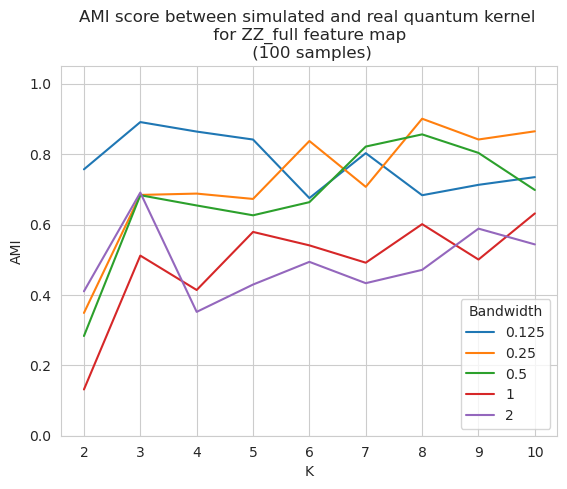

In [92]:
#Plot ARI and NMI
ft_map_to_plot='ZZ_full'
score_to_plot='AMI'
sns.set_style("whitegrid")
sns.lineplot(data=df_nmi_ari[df_nmi_ari['ftmap'].isin([ft_map_to_plot])],y=score_to_plot,x='K',hue='Bandwidth',markers=True,palette='tab10')
plt.ylim(0.00,1.05)
plt.title('{} score between simulated and real quantum kernel \n for {} feature map \n ({} samples)'.format(score_to_plot,ft_map_to_plot,df.N_samples[0]))
plt.savefig(outdir+'{}_ftmap_{}_score.png'.format(ft_map_to_plot,score_to_plot))

# Sankey and Survival


### Load and prepare data

In [109]:
#Load original patient index from data and metabric data(metadata)
#Load clustering data
print('#### CASE 1000 samples simulated ####')
df_clust=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Unsupervised_1000_umap/clustering_1000_clusters.csv',index_col=0)
df_clust.replace('Z_full','Z',inplace=True)
data_input = pd.read_csv("Input_data/UMAP_METABRIC_4cmp_IC10_full.csv", sep = ",",index_col=0)
patient_index=data_input.sample(n=1000,axis=0,random_state=42).index
#set index to df_clust to patient index
df_clust.index=patient_index

#Load metadata
metabric = pd.read_csv('/CTGlab/data/brca_metabric/data_clinical_patient.txt', sep='\t', skiprows=[0,1,2,3])
#Remove patients with missing OS_STATUS and merge with data
metabricSubset = metabric.loc[~metabric['OS_STATUS'].isna()]
quantumDf = pd.merge(metabricSubset, df_clust, how='left', right_on=[df_clust.index], left_on=['PATIENT_ID']).dropna(subset=df_clust.columns)
quantumDf['OS_STATUS_censored'] = quantumDf['VITAL_STATUS'].apply(lambda x: 1 if x == "Died of Disease" else 0) 
quantumDf['OS_STATUS'] = quantumDf['OS_STATUS'].apply(lambda x: int(x.split(':')[0]))

#### CASE 1000 samples simulated ####


In [110]:
print('#### CASE 100 samples real ####')
patient_index_100=data_input.sample(n=100,axis=0,random_state=42).index
df_clust_real.index=patient_index_100
quantumDf_real_100 = pd.merge(metabricSubset, df_clust_real, how='left', right_on=[df_clust_real.index], left_on=['PATIENT_ID']).dropna(subset=df_clust_real.columns)
quantumDf_real_100['OS_STATUS_censored'] = quantumDf_real_100['VITAL_STATUS'].apply(lambda x: 1 if x == "Died of Disease" else 0)
quantumDf_real_100['OS_STATUS'] = quantumDf_real_100['OS_STATUS'].apply(lambda x: int(x.split(':')[0]))

#### CASE 100 samples real ####


In [111]:
print('#### CASE 100 samples sim ####')
df_clust_sim.index=patient_index_100
quantumDf_sim_100 = pd.merge(metabricSubset, df_clust_sim, how='left', right_on=[df_clust_sim.index], left_on=['PATIENT_ID']).dropna(subset=df_clust_sim.columns)
quantumDf_sim_100['OS_STATUS_censored'] = quantumDf_sim_100['VITAL_STATUS'].apply(lambda x: 1 if x == "Died of Disease" else 0)
quantumDf_sim_100['OS_STATUS'] = quantumDf_sim_100['OS_STATUS'].apply(lambda x: int(x.split(':')[0]))


#### CASE 100 samples sim ####


## Check Survival



In [96]:
def plot_KM_curves(survDf: pd.DataFrame, durationVar: str, eventVar: str, indVar: str, ax=None, groups=None, **kwargs):
    """
    Plot KM curve with respect to an independent variable, including logrank test.

    Parameters:
    - survDf (pd.DataFrame): dataframe
    - durationVar (str): Column name with survival time
    - eventVar (str): Column name denoting the event. Must be encoded as boolean or int (0,1)
    - indVar (str): Column name with the independent variable. If it contains more than two different values, the groups 
        to be tested with the log-rank must be provided with the groups argument
    - ax (plt.Axes): matplotlib axes
    - groups (Iterable): Iterable containing values to be tested for logrank
    - **kwargs: arguments for the lifelines.KaplanMeierFitter function.

    Returns:

    plt.Axes
    """
    levels = np.sort(survDf[indVar].dropna().unique())
    if len(levels) == 2:
            pval = lifelines.statistics.logrank_test(
            durations_A=survDf[survDf[indVar] == levels[0]][durationVar],
            durations_B=survDf[survDf[indVar] == levels[1]][durationVar],
            events_observed_A=survDf[survDf[indVar] == levels[0]][eventVar],
            events_observed_B=survDf[survDf[indVar] == levels[1]][eventVar]
            ).p_value
    else:
        try:
            iter(groups)
            pval = lifelines.statistics.logrank_test(
                durations_A=survDf[survDf[indVar] == groups[0]][durationVar],
                durations_B=survDf[survDf[indVar] == groups[1]][durationVar],
                events_observed_A=survDf[survDf[indVar] == groups[0]][eventVar],
                events_observed_B=survDf[survDf[indVar] == groups[1]][eventVar]
                ).p_value
        except TypeError:
            print('Groups require an iterable containing two variables to compare between')
            return None
    kmPlots = [None for _ in levels]
    # calc the p-val
    at = AnchoredText('$p$: {}'.format(float(np.round(pval, 7))),prop=dict(fontproperties=fm.FontProperties(fname=fontPath, size=12)), frameon=True, loc='lower left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    # ax.set_title(f'KM curve for covariate "{var}"')
    ax.add_artist(at)
    ax.set_facecolor('none')
    ax.set_ylim(0, 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for idx,level in enumerate(levels):
        kmPlots[idx] = lifelines.KaplanMeierFitter()
        events = (survDf[indVar] == level)
        kmPlots[idx].fit(
            durations=survDf[durationVar][events],
            event_observed=survDf[eventVar][events],
            label=level)
        kmPlots[idx].plot(ax=ax, **kwargs, lw=2.5, color=sns.color_palette('colorblind')[idx])
    lifelines.plotting.add_at_risk_counts(*kmPlots, ax=ax, fontproperties=fm.FontProperties(fname=fontPath, size=10))


    return ax

In [97]:
quantumDf['VITAL_STATUS'].value_counts()


VITAL_STATUS
Living                  435
Died of Disease         313
Died of Other Causes    251
Name: count, dtype: int64

In [98]:
quantumDf['OS_MONTHS'].describe()

count    1000.000000
mean      128.472167
std        75.786077
min         0.000000
25%        64.541667
50%       122.733333
75%       186.558333
max       355.200000
Name: OS_MONTHS, dtype: float64

Text(0, 0.5, 'Overall survival probability')

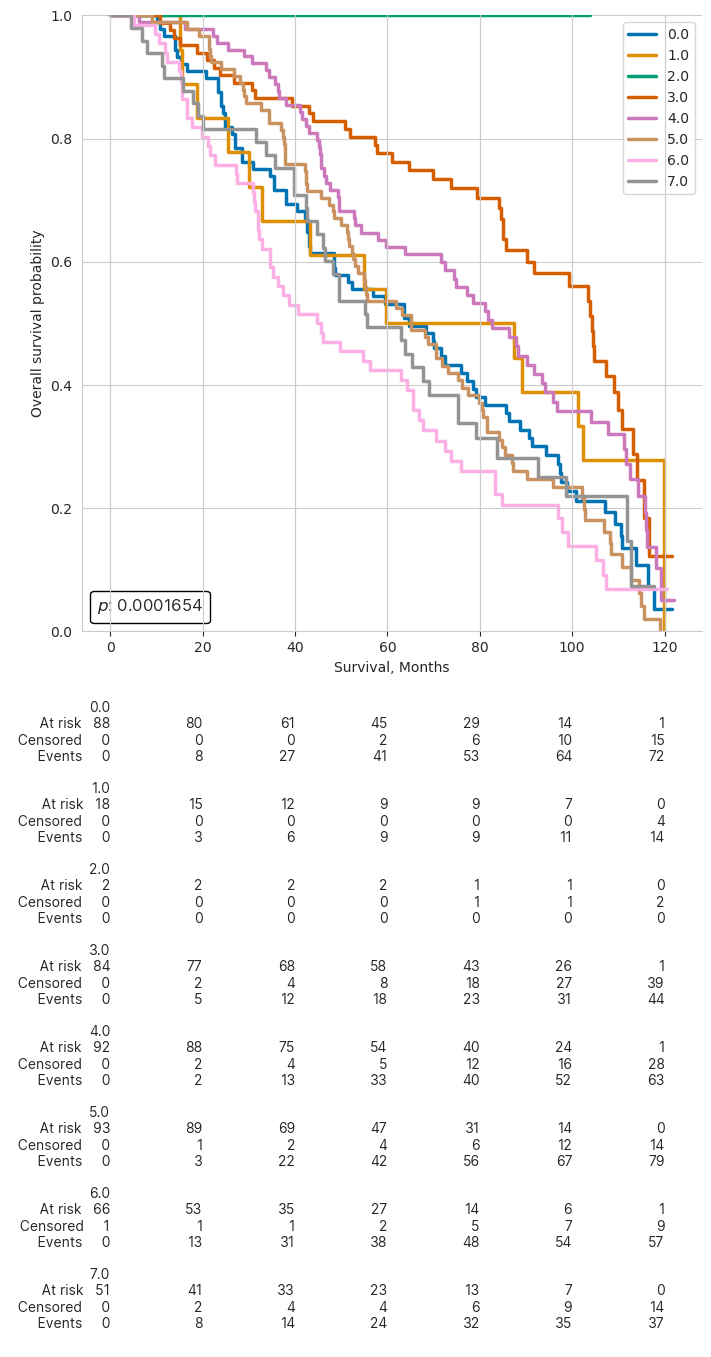

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
plot_KM_curves(
    quantumDf.loc[quantumDf['OS_MONTHS'] < 122], durationVar='OS_MONTHS',eventVar='OS_STATUS', indVar='Cluster_ZZ_full_8_0.25', groups=[6,3], ax=ax, ci_show=False)
ax.set_xlabel('Survival, Months')
ax.set_ylabel('Overall survival probability')
#ax.legend( loc="best")
#ax.set_title('ZZ_linear_039 clustering \n 8 clusters')
#fig.tight_layout()

## Sankey

### Real 100 samples

In [100]:
cluster_col=[]
for i in quantumDf_real_100.columns:
    if 'Cluster' in i:
        cluster_col.append(i)

In [101]:
quantumDf_s=quantumDf_real_100.copy()
for column in quantumDf_s.loc[:, ['INTCLUST','CLAUDIN_SUBTYPE']+cluster_col].columns:
    quantumDf_s[column] = quantumDf_s[column].apply(lambda x: f"{column}_{x}")

In [102]:
def plotSankey(df: pd.DataFrame, cols: list, names=None,linkVar=None, valueToHighlight=None):
    """
    Plot a Sankey diagram based on the given dataframe and columns.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - cols (list): A list of column names to use for plotting.
    - linkVar (str): The name of the column to use as a link variable (optional).
    - valueToHighlight: The value in the link variable to highlight (optional).

    Returns:
    - fig: The generated plotly figure object.
    """
    colsToPlot = []
    for col in cols:
       colsToPlot.append(list(set(x for x in df[col])))

    mask = {}
    toenumerate = []
    for i in range(len(colsToPlot)):
       toenumerate = toenumerate + colsToPlot[i]
    for k,v in enumerate(toenumerate):
        mask[v] = k

    combinations = []
    for i in range(0, len(colsToPlot)-1):
       combinations = combinations + list(itertools.product(colsToPlot[i], colsToPlot[i+1]))
       

    sources = []
    targets = []
    values = []
    colors = []
    if linkVar != None:
      linkVarValues = df[linkVar].unique()
    for combination in combinations:
        source = mask[combination[0]]
        target = mask[combination[1]]
        column1 = '_'.join(combination[0].split('_')[:-1])
        column2 = '_'.join(combination[1].split('_')[:-1])
        
        if linkVar != None:
          for idx,val in enumerate(linkVarValues):
              flow = df.loc[(df[column1] == combination[0])&(df[column2] == combination[1])&(df[linkVar] == val)].shape[0]
              color = "lightgrey" if val != valueToHighlight else "orange"
              colors.append(color)
              sources.append(source) 
              targets.append(target)
              values.append(flow)
        else:
          flow = df.loc[(df[column1] == combination[0])&(df[column2] == combination[1])].shape[0]
          colors.append('lightgrey')
          sources.append(source) 
          targets.append(target)
          values.append(flow)
    
         
    fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [f"{x.split('_')[-1]}" for x in toenumerate ]
    ),
    link = dict(
      source = sources, 
      target = targets,
      value = values,
      color = colors,
      label=[f"{x.split('_')[-1]}" for x in toenumerate ]
  ))])
    if names == None:
       names=cols
    for x_coordinate, column_name in enumerate(names):
        fig.add_annotation(
                x=x_coordinate,
                y=1.05,
                xref="x",
                yref="paper",
                text=column_name,
                showarrow=False,
                font=dict(
                    size=16,
                    color="black"
                    ),
                align="center",
                )
    fig.update_layout(
        title='Sample Assignments in Clustering Methods' if valueToHighlight==None else f"Sample Assignments in Clustering Methods\nHighlighted {valueToHighlight}",
        plot_bgcolor='white',
        paper_bgcolor='white',
        font_size=14,
        hovermode='x',
        autosize=False,
        width=1000, height=600,
        xaxis={
        'showgrid': False, # thin lines in the background
        'zeroline': False, # thick line at x=0
        'visible': False,  # numbers below
        },
        yaxis={
        'showgrid': False, # thin lines in the background
        'zeroline': False, # thick line at x=0
        'visible': False,  # numbers below
        }

    ) 
    fig.show()
    return fig

In [103]:
quantumDf_s.CELLULARITY.value_counts()

CELLULARITY
High        51
Moderate    36
Low          9
Name: count, dtype: int64

To plot:
- first get the clusterings with the best coherence
- checek wich ones have the best silhouette and DI
- plot for confrontation


In [112]:
#The ones with best silhouette
df_real.iloc[best_ami_idx].sort_values(by='silhouette',ascending=False)

,Unnamed: 0,ftmap,K,Bandwidth,s,geom_distance,concentration,silhouette,Score_cluster,CHI,DI,v_intra,v_inter,N_samples
108,108,Z_full,2,0.50,6057.476628,2.091055,0.066699,0.558708,0.546341,44.248236,0.878541,0.047888,0.000839,100
112,112,Z_full,6,0.50,6057.476628,2.091055,0.066699,0.349453,0.539596,49.736345,0.077218,0.020054,0.053205,100
111,111,Z_full,5,0.50,6057.476628,2.091055,0.066699,0.345328,0.489086,47.422333,0.071603,0.024498,0.054389,100
109,109,Z_full,3,0.50,6057.476628,2.091055,0.066699,0.322350,0.390373,47.500560,0.082701,0.030636,0.065569,100
122,122,Z_full,7,1.00,4097.149781,3.207312,0.053731,0.319908,0.396945,46.765743,0.135121,0.047943,0.022372,100
100,100,Z_full,3,0.25,10403.194977,3.860099,0.019106,0.319376,0.446294,32.530205,0.134315,0.006838,0.042391,100
102,102,Z_full,5,0.25,10403.194977,3.860099,0.019106,0.276013,0.477067,57.298958,0.101108,0.004788,0.032672,100
120,120,Z_full,5,1.00,4097.149781,3.207312,0.053731,0.263627,0.285558,42.044629,0.064890,0.062896,0.024372,100
118,118,Z_full,3,1.00,4097.149781,3.207312,0.053731,0.234614,0.188932,51.586242,0.154200,0.054458,0.009508,100
117,117,Z_full,2,1.00,4097.149781,3.207312,0.053731,0.210122,0.188603,44.248236,0.825989,0.050707,0.000704,100


In [148]:
#plot best 3
cols_name_S=[]
cols_to_plot=[]
for i in df_real.iloc[best_ami_idx].sort_values(by='silhouette',ascending=False).head(3).itertuples():

    name='Cluster_'+i.ftmap+'_'+str((i.K))+'_'+str(i.Bandwidth)
    name_col='b:{},Silhouette:{:.1f}, DI:{:.1f}'.format(i.Bandwidth,i.silhouette,i.DI)
    cols_to_plot.append(name)
    cols_name_S.append(name_col)

In [115]:
cols_to_plot

['Cluster_Z_full_2_0.5', 'Cluster_Z_full_6_0.5', 'Cluster_Z_full_5_0.5']

In [150]:
fig = plotSankey(quantumDf_s, cols=cols_to_plot,names=cols_name_S, valueToHighlight=['High'], linkVar='CELLULARITY')

Lets look at the DI

In [121]:
#The ones with best silhouette
df_real.iloc[best_ami_idx].sort_values(by='DI',ascending=False)

,Unnamed: 0,ftmap,K,Bandwidth,s,geom_distance,concentration,silhouette,Score_cluster,CHI,DI,v_intra,v_inter,N_samples
108,108,Z_full,2,0.50,6057.476628,2.091055,0.066699,0.558708,0.546341,44.248236,0.878541,0.047888,0.000839,100
117,117,Z_full,2,1.00,4097.149781,3.207312,0.053731,0.210122,0.188603,44.248236,0.825989,0.050707,0.000704,100
128,128,Z_full,4,2.00,6454.449698,10.512267,0.023323,0.119377,0.149922,5.631460,0.264826,0.046313,0.007921,100
129,129,Z_full,5,2.00,6454.449698,10.512267,0.023323,0.138088,0.176454,3.551386,0.174736,0.049660,0.009291,100
118,118,Z_full,3,1.00,4097.149781,3.207312,0.053731,0.234614,0.188932,51.586242,0.154200,0.054458,0.009508,100
126,126,Z_full,2,2.00,6454.449698,10.512267,0.023323,0.081838,0.082667,0.604951,0.143146,0.033291,0.008383,100
122,122,Z_full,7,1.00,4097.149781,3.207312,0.053731,0.319908,0.396945,46.765743,0.135121,0.047943,0.022372,100
100,100,Z_full,3,0.25,10403.194977,3.860099,0.019106,0.319376,0.446294,32.530205,0.134315,0.006838,0.042391,100
133,133,Z_full,9,2.00,6454.449698,10.512267,0.023323,0.208903,0.285488,3.278177,0.127575,0.056267,0.009723,100
132,132,Z_full,8,2.00,6454.449698,10.512267,0.023323,0.191574,0.254894,2.966942,0.127495,0.055898,0.009614,100


In [161]:
cols_to_plot_DI=[]
cols_name_DI=[]
for i in df_real.iloc[best_ami_idx].sort_values(by='DI',ascending=False).head(10).itertuples():
    print(i)
    name='Cluster_'+i.ftmap+'_'+str((i.K))+'_'+str(i.Bandwidth)
    name_col='b:{},Silhouette:{:.1f}, DI:{:.1f}'.format(i.Bandwidth,i.silhouette,i.DI)
    cols_name_DI.append(name_col)
    cols_to_plot_DI.append(name)

Pandas(Index=108, _1=108, ftmap='Z_full', K=2, Bandwidth=0.5, s=6057.476627550201, geom_distance=2.091055194625319, concentration=0.0666988403978254, silhouette=0.5587082974563701, Score_cluster=0.5463409326550196, CHI=44.24823618266621, DI=0.8785405812164223, v_intra=0.0478884881535952, v_inter=0.0008386148951701, N_samples=100)
Pandas(Index=117, _1=117, ftmap='Z_full', K=2, Bandwidth=1.0, s=4097.1497812446505, geom_distance=3.2073117863193272, concentration=0.0537312108164177, silhouette=0.2101217896633697, Score_cluster=0.1886030076016354, CHI=44.24823618266621, DI=0.8259891335177059, v_intra=0.0507069637545135, v_inter=0.0007044750280744, N_samples=100)
Pandas(Index=128, _1=128, ftmap='Z_full', K=4, Bandwidth=2.0, s=6454.449697974645, geom_distance=10.512267164573467, concentration=0.0233232595193403, silhouette=0.1193767992882399, Score_cluster=0.1499222772801551, CHI=5.631460134423725, DI=0.2648262163996085, v_intra=0.0463125044713377, v_inter=0.0079213957876418, N_samples=100)
P

In [158]:
cols_to_plot_DI

['Cluster_Z_full_2_0.5',
 'Cluster_Z_full_2_1.0',
 'Cluster_Z_full_4_2.0',
 'Cluster_Z_full_5_2.0',
 'Cluster_Z_full_3_1.0',
 'Cluster_Z_full_2_2.0',
 'Cluster_Z_full_7_1.0',
 'Cluster_Z_full_3_0.25',
 'Cluster_Z_full_9_2.0',
 'Cluster_Z_full_8_2.0']

In [164]:
fig=plotSankey(quantumDf_s, cols=['Cluster_Z_full_2_1','Cluster_Z_full_4_2', 'Cluster_Z_full_7_1'], valueToHighlight=['High'], linkVar='CELLULARITY')

Since k=2 is uninformative and has a high clustering score due to the bias of both DI and the silhouette we discharge it. We move further to compare the remaining

In [166]:
fig=plotSankey(quantumDf_s, cols=['Cluster_Z_full_4_2','Cluster_Z_full_5_0.5','Cluster_Z_full_6_0.5', 'Cluster_Z_full_7_1'], valueToHighlight=['High'], linkVar='CELLULARITY')

# Check Clustering correlation with other variables


In [ ]:
data_input

,Component_1,Component_2,Component_3,Component_4,IntClustMemb
MB-4666,5.497749,4.056644,9.238402,3.813853,7
MB-2851,3.134798,3.639698,10.175092,2.422124,4
MB-5366,4.140319,3.347784,8.551789,3.669222,5
MB-5341,5.439688,4.379867,9.285794,3.870328,2
MB-0358,5.223124,3.096975,9.557095,2.317304,9
...,...,...,...,...,...
MB-2849,3.129499,2.973610,10.085953,2.397814,9
MB-0022,4.345609,8.725343,6.175104,-0.403735,3
MB-4721,4.022290,4.786006,8.769722,4.222514,8
MB-5625,3.244882,1.117559,9.360249,3.188984,9


In [ ]:
quantumDf.set_index('PATIENT_ID',inplace=True)

In [ ]:
#Merge data_input with df_clust on index
df_new_clust=pd.merge(data_input.sample(n=1000,axis=0,random_state=42),quantumDf,how='left',left_index=True,right_index=True)
df_new_clust


,Component_1,Component_2,Component_3,Component_4,IntClustMemb,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,...,Cluster_ZZ_linear_2_2,Cluster_ZZ_linear_3_2,Cluster_ZZ_linear_4_2,Cluster_ZZ_linear_5_2,Cluster_ZZ_linear_6_2,Cluster_ZZ_linear_7_2,Cluster_ZZ_linear_8_2,Cluster_ZZ_linear_9_2,Cluster_ZZ_linear_10_2,OS_STATUS_censored
MB-4270,4.459003,1.762128,8.716180,3.800151,9,4.0,5.036,NaN,YES,3.0,...,0.0,1.0,3.0,4.0,0.0,6.0,7.0,8.0,2.0,1
MB-6068,3.232354,0.750432,9.716409,3.052997,4,0.0,3.000,Moderate,NO,5.0,...,0.0,1.0,2.0,3.0,5.0,3.0,3.0,5.0,4.0,0
MB-0666,4.351296,3.491412,9.277145,2.818116,9,9.0,6.050,High,YES,1.0,...,1.0,0.0,1.0,1.0,4.0,2.0,0.0,6.0,5.0,1
MB-7010,5.542212,4.578652,9.395142,3.620670,7,0.0,2.046,Moderate,NO,4.0,...,0.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,1.0,0
MB-7036,3.751446,0.916476,9.636867,2.495010,10,2.0,5.036,High,YES,4.0,...,1.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-3005,3.471740,4.602711,9.672564,2.170086,8,0.0,3.046,Moderate,NO,2.0,...,0.0,2.0,2.0,2.0,3.0,4.0,6.0,7.0,0.0,0
MB-6024,3.996194,4.647072,8.249059,4.461824,8,2.0,4.040,Moderate,NO,5.0,...,0.0,1.0,1.0,0.0,2.0,5.0,1.0,2.0,7.0,1
MB-0045,4.296920,1.071461,9.469940,2.832558,4,3.0,5.038,High,YES,1.0,...,1.0,1.0,3.0,0.0,2.0,5.0,1.0,2.0,7.0,0
MB-3430,3.837388,4.110645,8.960909,2.663787,3,1.0,5.050,High,NO,2.0,...,0.0,2.0,2.0,3.0,1.0,1.0,5.0,3.0,4.0,0


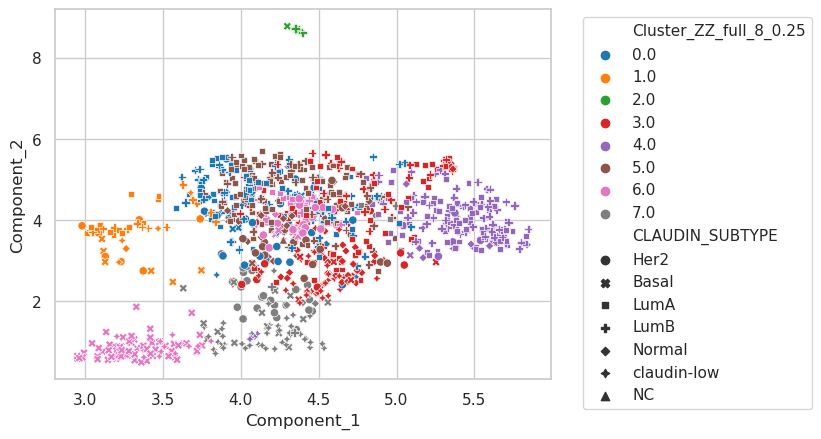

In [ ]:
sns.scatterplot(data=df_new_clust,
                x='Component_1',
                y='Component_2',
                hue='Cluster_ZZ_full_8_0.25',
                style='CLAUDIN_SUBTYPE',
                palette='tab10')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

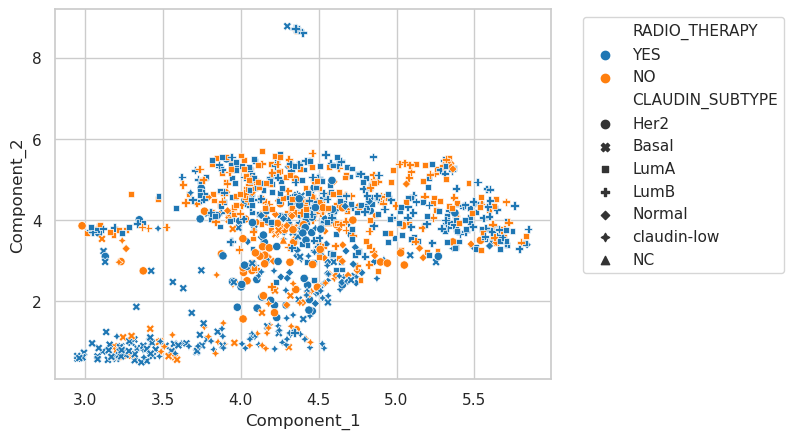

In [ ]:
sns.scatterplot(data=df_new_clust,
                x='Component_1',
                y='Component_2',
                hue='RADIO_THERAPY',
                style='CLAUDIN_SUBTYPE',
                palette='tab10')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
df_new_clust['HORMONE_THERAPY'].value_counts()

HORMONE_THERAPY
YES    606
NO     394
Name: count, dtype: int64

In [ ]:
quantumDf.columns[:20]

Index(['LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY', 'CHEMOTHERAPY',
       'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY',
       'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE',
       'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE'],
      dtype='object')

In [ ]:
adjusted_mutual_info_score(df_new_clust['Cluster_ZZ_linear_8_0.25'],df_new_clust['SEX'])

0.0